Hobot Academy Contact Information
- **Website:** [Click here](https://hobotacademy.com)
- **Telegram Channel:** [Click here](https://t.me/hobotacademy)
- **YouTube:** [Click here](https://www.youtube.com/channel/UCfsmyuGvktcocxLa7HfBetA)
- **Instagram:** [Click here](https://www.instagram.com/hobot.academy)
- **All Social Media:** [Click here](https://zil.ink/hobot)

# Libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the images

In [4]:
def load_process_img(image_path, target_size=(400, 400)):
  image = load_img(image_path, target_size=target_size)
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0) #1, h, w, ch
  image = vgg19.preprocess_input(image)
  return image

# Deprocess the image to visualize it

In [5]:
def deprocess_image(image):
  image = image.reshape((image.shape[1], image.shape[2], 3))
  image[:, :, 0] += 103.939
  image[:, :, 1] += 116.779
  image[:, :, 2] += 123.68
  image = image[:, :, ::-1]
  image = np.clip(image, 0, 255).astype('uint8')
  return image

# Load the content and style images

In [6]:
content_image_path = '/content/drive/MyDrive/Hobot/premium_photo-1669748157617-a3a83cc8ea23.jpg'  # Change to your content image path
style_image_path = '/content/drive/MyDrive/Hobot/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'      # Change to your style image path

In [7]:
content_image = load_process_img(content_image_path)
style_image = load_process_img(style_image_path)

# Build the model using VGG19

In [8]:
vgg = vgg19.VGG19(weights='imagenet', include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [9]:
print(vgg.summary())

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

None


# Extract content and style layers

In [10]:
content_layer = 'block5_conv2'

style_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1'
]

layers = style_layers + [content_layer]

In [11]:
layers

['block1_conv1',
 'block2_conv1',
 'block3_conv1',
 'block4_conv1',
 'block5_conv1',
 'block5_conv2']

# Create a model that outputs the style and content layer activations

In [12]:
outputs = [vgg.get_layer(layer).output for layer in layers]
model = Model(inputs = vgg.input, outputs = outputs)

model.trainable = False

# Define the loss functions for content and style

In [13]:
def content_loss(base_content, target):
  return tf.reduce_mean(tf.square(base_content - target))

In [14]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_location = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result / num_location

In [15]:
def style_loss(base_style, gram_target):
  gram_style = gram_matrix(base_style)
  return tf.reduce_mean(tf.square(gram_style - gram_target))

In [16]:
def total_loss(outputs, content_target, style_targets, content_weight=1e4, style_weight=1e-2):
  content_output = outputs[len(style_layers)]
  content_l = content_loss(content_output, content_target)
  style_outputs = outputs[:len(style_layers)]
  style_l = tf.add_n([style_loss(style_outputs[i], style_targets[i]) for i in range(len(style_layers))])
  total_l = content_weight * content_l + style_weight * style_l
  return total_l

# Extract the content and style features

In [17]:
content_target = model(content_image)[len(style_layers)]
style_targets = [gram_matrix(feature) for feature in model(style_image)[:len(style_layers)]]

# Set up the optimizer and the target image

In [18]:
target_image = tf.Variable(content_image, dtype=tf.float32)
optimizer = tf.optimizers.Adam(learning_rate=5.0)

# Training step for style transfer

In [19]:
@tf.function()
def train_step(target_image):
  with tf.GradientTape() as tape:
    outputs = model(target_image)
    loss = total_loss(outputs, content_target, style_targets)
  grad = tape.gradient(loss, target_image)
  optimizer.apply_gradients([(grad, target_image)])
  target_image.assign(tf.clip_by_value(target_image, -103.939, 255.0 - 103.939))

# Run the style transfer

In [20]:
epochs = 1000
for epoch in range(epochs):
  train_step(target_image)
  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {total_loss(model(target_image), content_target, style_targets).numpy()}")

Epoch 0, Loss: 748255616.0
Epoch 100, Loss: 11172056.0
Epoch 200, Loss: 8435035.0
Epoch 300, Loss: 6595520.0
Epoch 400, Loss: 5922958.5
Epoch 500, Loss: 5497572.5
Epoch 600, Loss: 5538881.0
Epoch 700, Loss: 5022293.0
Epoch 800, Loss: 7141132.0
Epoch 900, Loss: 4671751.5


# Deprocess and show the resulting image

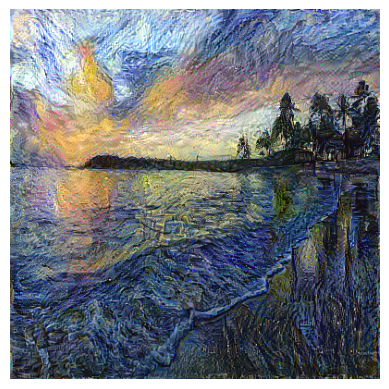

In [21]:
result_image = deprocess_image(target_image.numpy())
plt.imshow(result_image)
plt.axis('off')
plt.show()